In [1]:
from SRRS import vignette, plotting, metrics
import matplotlib.pyplot as plt

In [2]:
#get a list of cells from one of the included datasets
sample = vignette.m1s4_hdf5()
print(sample.path) #<-- where the hdf5 input file is

cells = sample.cells()
cells

/home/rob/SRRS/src/SRRS/vignette_data/merfish_m1s4_vignette.hdf5


[Cell-100042292675978612289781789372249900646-L6_IT_3,
 Cell-100070027782195876079415879748834848836-L45_IT_3,
 Cell-100119755510557417791056480683612014915-L6_CT_5,
 Cell-100120630789554574689109334609716249164-Pvalb_4,
 Cell-100130021246024550058891566536662366819-L45_IT_5,
 Cell-100135768499645921485399243103156491707-L23_IT_3,
 Cell-100196112419082045488014652263334825841-L23_IT_3,
 Cell-100239797373311630209489970275162397033-L5_ET_3,
 Cell-100254037659267601430852197780862098731-L6_IT_3,
 Cell-100272875882225814505272431346995414912-L45_IT_2,
 Cell-100301297440121711165243332589431955393-L6_IT_2,
 Cell-100315078070569273470311005960792658409-L5_IT_1,
 Cell-100318456929671597800426226497319235606-L6_CT_1,
 Cell-100431609524707826624339835425318791388-L23_IT_3,
 Cell-1004824975624069210559970798193577754-Vip_7,
 Cell-100574930949484809578634906420360731463-L5_ET_4,
 Cell-10057681216051175595750593230904675495-L6b_3,
 Cell-100686711639775161991991549599488005380-Pvalb_4,
 Cell-10071

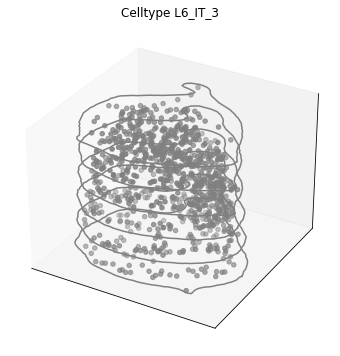

In [3]:
#plot the first cell in the list in 3D
fig = plotting.plot_cell_3D(cells[0])

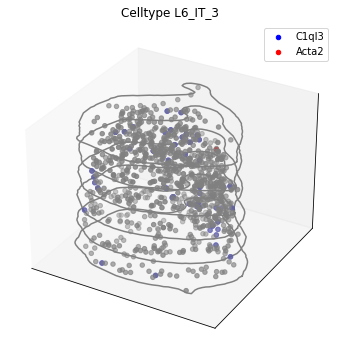

In [4]:
#plot again coloring specific genes of interest
fig = plotting.plot_cell_3D(cells[0], gene_colors={'C1ql3':'blue','Acta2':'red'})

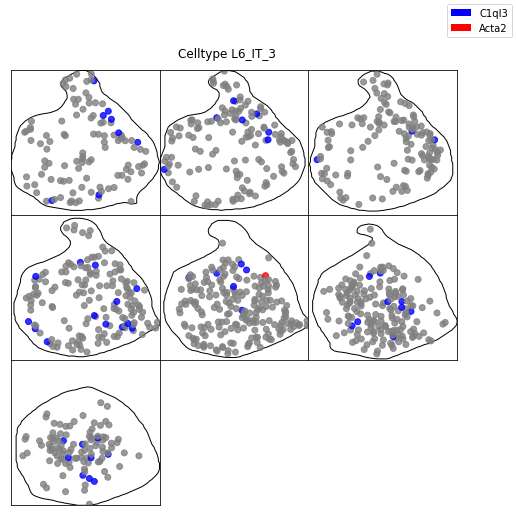

In [5]:
#plot the same cell but each zslice separately
fig = plotting.plot_cell_zslices(cells[0],gene_colors={'C1ql3':'blue','Acta2':'red'})

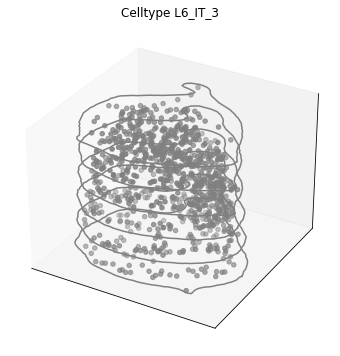

In [6]:
#plot the first cell in the list in 3D
fig = plotting.plot_cell_3D(cells[0],color_by_rank=True)

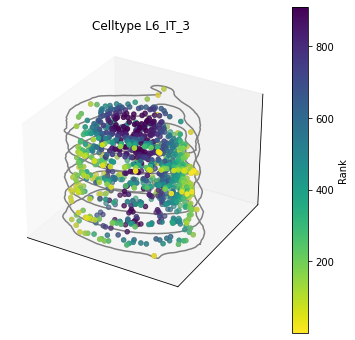

In [7]:
#rank the spots using the peripheral metric then replot (edits cell in place)
cell = cells[0]
metrics.peripheral(cell)

fig = plotting.plot_cell_3D(cell,color_by_rank=True)

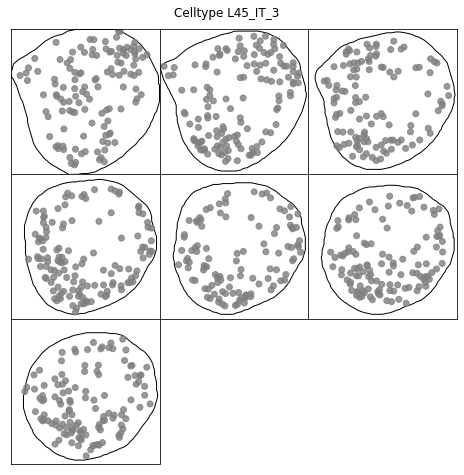

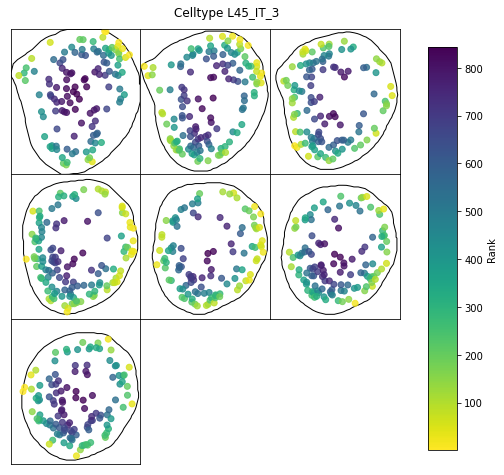

In [8]:
#2D color by rank on a new cell (should fail)
#then calculate spot ranks and re-plot
new_cell = cells[1]
fig = plotting.plot_cell_zslices(new_cell,color_by_rank=True)
metrics.peripheral(new_cell)
fig = plotting.plot_cell_zslices(new_cell,color_by_rank=True)

/home/rob/SRRS/src/SRRS/metrics.py:146: RuntimeWarning: invalid value encountered in arccos
  print(norm_vec)


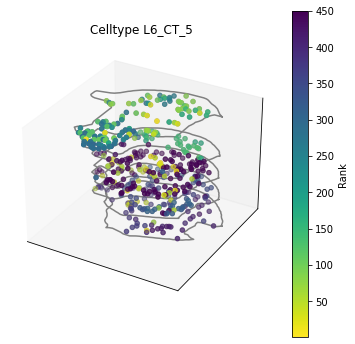

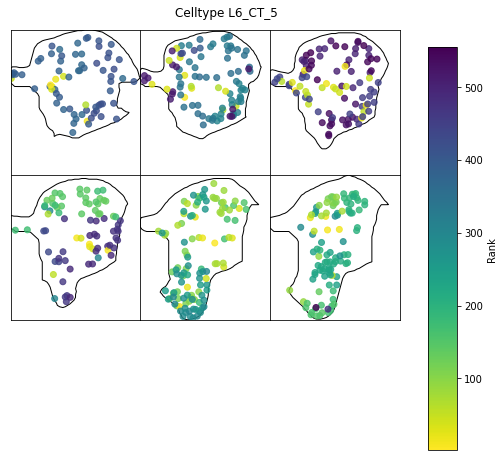

In [76]:
#2D color by radial rank (not as obvious since each spot is compared to its gene radial centroid)
from SRRS import plotting,metrics,vignette
import importlib
importlib.reload(plotting)
importlib.reload(metrics)

sample = vignette.m1s4_hdf5()
cells = sample.cells()
new_cell = cells[2]
metrics.radial(new_cell)

fig = plotting.plot_cell_3D(new_cell,color_by_rank=True)
fig = plotting.plot_cell_zslices(new_cell,color_by_rank=True)

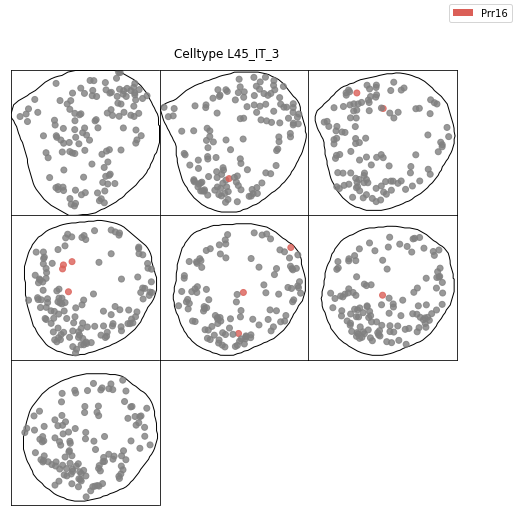

In [109]:
#Trying to visualize if the radial metric is "working" by plotting the most extreme scoring gene
from SRRS import plotting,metrics,vignette
import importlib
import seaborn as sns
importlib.reload(plotting)
importlib.reload(metrics)

sample = vignette.m1s4_hdf5()
cells = sample.cells()
new_cell = cells[1]
metrics.radial(new_cell)

#Color k genes with smallest median ranks
num_min = 1
min_spot_count = 5
genes_of_interest = []
mins = []

for gene,med_rank in new_cell.gene_med_ranks.items():
    if new_cell.gene_counts[gene] < min_spot_count:
        continue
    
    if len(genes_of_interest) < num_min:
        genes_of_interest.append(gene)
        mins.append(med_rank)
    elif med_rank < max(mins):
        pop_ind = mins.index(max(mins))
        genes_of_interest[pop_ind] = gene
        mins[pop_ind] = med_rank
            
colors = sns.color_palette("hls", num_min)
gene_colors = {g.decode():c for g,c in zip(genes_of_interest,colors)}

fig = plotting.plot_cell_zslices(new_cell,gene_colors=gene_colors)

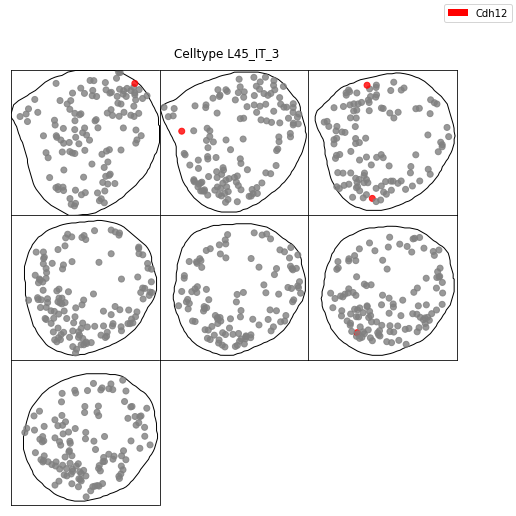

In [139]:
#Trying to visualize if the radial metric is "working" by plotting the most extreme scoring gene
from SRRS import plotting,metrics,vignette
import importlib
import operator as op
importlib.reload(plotting)
importlib.reload(metrics)

sample = vignette.m1s4_hdf5()
cells = sample.cells()
new_cell = cells[1]
metrics.peripheral(new_cell)
min_spot_count = 5

comp = op.lt ##use to find most peripheral and most radial
#comp = op.gt #use to find least peripheral and least radial

goi = None
extreme_med = None
for gene,med in new_cell.gene_med_ranks.items():
    if new_cell.gene_counts[gene] < min_spot_count:
        continue
        
    if not extreme_med or comp(med,extreme_med):
        extreme_med = med
        goi = gene
        
gene_colors = {goi.decode():'red'}
#gene_colors = {'Dscaml1':'red'}

fig = plotting.plot_cell_zslices(new_cell,gene_colors=gene_colors)

In [132]:
sorted([(k,v) for k,v in new_cell.gene_med_ranks.items()],key=lambda k: k[1])

[(b'C1qtnf7', 43.0),
 (b'Brinp3', 68.0),
 (b'Nkain3', 96.0),
 (b'Ccdc80', 97.0),
 (b'Sox10', 119.0),
 (b'Ltf', 127.0),
 (b'Fosb', 137.0),
 (b'Trpc4', 140.5),
 (b'Slc17a6', 160.0),
 (b'Phactr2', 161.5),
 (b'Prr16', 185.0),
 (b'Trpc6', 200.5),
 (b'Flrt3', 210.5),
 (b'Pld5', 219.0),
 (b'Nxph2', 222.0),
 (b'Ceacam9', 238.0),
 (b'Fezf2', 242.0),
 (b'Nnmt', 247.5),
 (b'Timp3', 251.0),
 (b'Pou3f3', 256.0),
 (b'Unc5d', 268.0),
 (b'Vwc2', 269.0),
 (b'Parm1', 281.0),
 (b'Shisa9', 287.0),
 (b'Acta2', 288.0),
 (b'Il4ra', 292.0),
 (b'Col25a1', 300.0),
 (b'Ntng2', 318.0),
 (b'Sulf2', 319.0),
 (b'Hs3st5', 320.0),
 (b'Ankfn1', 324.0),
 (b'Cxcl14', 327.0),
 (b'Igfbp5', 330.0),
 (b'Ptprk', 332.0),
 (b'Itgb8', 333.0),
 (b'Cdh13', 338.5),
 (b'Zfp804b', 343.0),
 (b'Calb2', 346.0),
 (b'Aqp4', 347.0),
 (b'St6galnac5', 352.0),
 (b'Unc13c', 354.0),
 (b'Rfx3', 359.5),
 (b'Slco5a1', 367.5),
 (b'Fst', 377.5),
 (b'Luzp2', 379.0),
 (b'Rgs5', 381.0),
 (b'Cd24a', 388.0),
 (b'C1ql3', 394.0),
 (b'Camk2d', 394.5),
 (b'S

In [134]:
new_cell.gene_counts[b'Dscaml1']

1